In [1]:
import pandas as pd

In [2]:
from google.colab import files

df= files.upload()

Saving CleanedDataSet.csv to CleanedDataSet.csv


In [3]:
df = pd.read_csv("CleanedDataSet.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 1091 non-null   int64  
 1   Equipment Number           1091 non-null   object 
 2   Equipment Class            1091 non-null   object 
 3   Equipment Category         1091 non-null   object 
 4   Service Group              1091 non-null   object 
 5   Department                 1091 non-null   object 
 6   Make                       1091 non-null   object 
 7   Model                      1091 non-null   object 
 8   Year                       1091 non-null   int64  
 9   Site                       1091 non-null   object 
 10  Mileage2024 (km)           833 non-null    float64
 11  HourMeter2024 (hours)      332 non-null    float64
 12  DowntimeHours2024 (hours)  1091 non-null   float64
 13  LaborHours2024 (hours)     1091 non-null   float

In [5]:
df["Equipment Category"].unique()

array(['light duty', 'hvy trk', 'hvy equip'], dtype=object)

#There are 3 equipment categories. The city is priotizing to cut down only light-duty and heavy Trucks. Lets merge the co2 values of light duty first

In [6]:
df_light_duty = df[df["Equipment Category"] == "light duty"].copy()

In [7]:
df_light_duty.describe()

,Unnamed: 0,Year,Mileage2024 (km),HourMeter2024 (hours),DowntimeHours2024 (hours),LaborHours2024 (hours),Age
count,505.000000,505.000000,505.000000,20.00000,505.000000,505.000000,505.000000
mean,375.716832,2006.677228,8707.932673,476.15000,114.842007,20.713712,18.322772
std,232.956398,4.262328,7100.807099,261.41342,123.493694,19.449908,4.262328
min,0.000000,1997.000000,0.000000,0.00000,1.249722,0.179720,11.000000
25%,179.000000,2003.000000,4422.000000,258.50000,30.546944,7.662780,14.000000
50%,382.000000,2006.000000,7323.000000,488.50000,70.408056,15.172770,19.000000
75%,563.000000,2011.000000,10618.000000,617.00000,153.043057,27.935290,22.000000
max,832.000000,2014.000000,59592.000000,911.00000,1071.692763,137.942520,28.000000


In [8]:
df_light_duty["Make"].unique()

array(['FORD', 'MERCEDES', 'MITSUBISHI', 'TOYOTA', 'GENERAL MOTORS',
       'GMC', 'SMART', 'DODGE', 'VOLKSWAGEN', 'YAMAHA'], dtype=object)

In [9]:
df_light_duty["Make"] = df_light_duty["Make"].replace({"GENERAL MOTORS": "GM", "GMC": "GM"})

In [10]:
df_light_duty["Make"].unique()

array(['FORD', 'MERCEDES', 'MITSUBISHI', 'TOYOTA', 'GM', 'SMART', 'DODGE',
       'VOLKSWAGEN', 'YAMAHA'], dtype=object)

#Upon researching the CO2 data for light duty on various gov websites, we found these two tables from canadian gov website.

##Source: https://www.canada.ca/content/dam/eccc/documents/pdf/cepa/ldv-ghg-performance-2018-eng.pdf

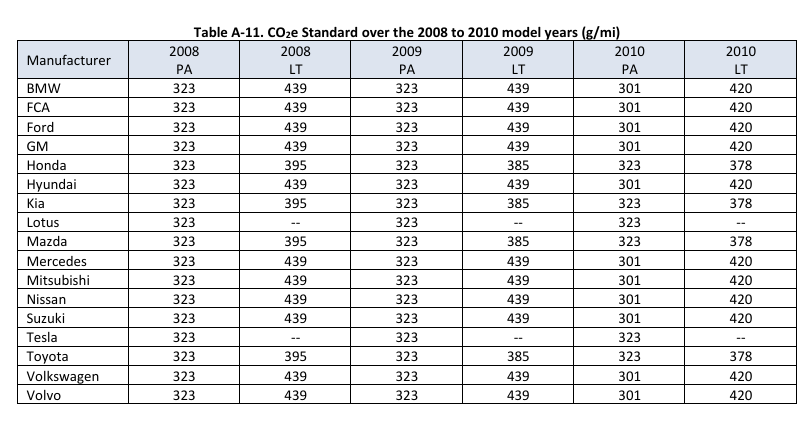

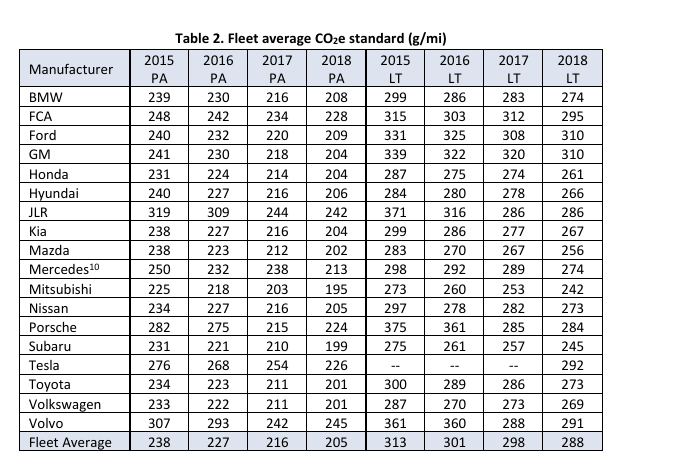


## We can see that only 2008-2010 and 2015-2018 Co2 values are available.
## Lets first extract these data

In [11]:
df_LT_Co2 = files.upload()

Saving Combined_LT_CO2_Standards.csv to Combined_LT_CO2_Standards.csv


In [12]:
df_LT_Co2 = pd.read_csv("Combined_LT_CO2_Standards.csv")

In [13]:
df_LT_Co2.reset_index(inplace=True)

In [14]:
df_LT_Co2.drop(columns=["index", "Unnamed: 0"], inplace=True)
df_LT_Co2

,Manufacturer,2008,2009,2010,2015,2016,2017,2018
0,BMW,439,439,420,286,283.0,274,274
1,FCA,439,439,420,315,303.0,312,295
2,Ford,439,439,420,331,325.0,308,310
3,GM,439,439,420,322,320.0,310,310
4,Honda,439,439,420,287,275.0,274,261
5,Hyundai,439,439,420,284,280.0,278,266
6,JLR,439,439,420,371,316.0,286,286
7,Kia,395,385,378,289,286.0,277,267
8,Mazda,395,385,378,283,270.0,267,256
9,Mercedes,439,439,420,298,292.0,289,274


#Since, the main dataset contains Model Year from 1997. Lets create columns for them as well

In [15]:
df_LT_Co2.set_index("Manufacturer", inplace=True)
df_LT_Co2.columns = df_LT_Co2.columns.astype(int)

In [16]:
all_years = list(range(1997, 2019))
all_years

[1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018]

In [17]:
df_LT_Co2 = df_LT_Co2.reindex(columns=all_years)
df_LT_Co2

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Manufacturer,,,,,,,,,,,,,,,,,,,,,
BMW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,439,420,NaN,NaN,NaN,NaN,286,283.0,274,274
FCA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,439,420,NaN,NaN,NaN,NaN,315,303.0,312,295
Ford,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,439,420,NaN,NaN,NaN,NaN,331,325.0,308,310
GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,439,420,NaN,NaN,NaN,NaN,322,320.0,310,310
Honda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,439,420,NaN,NaN,NaN,NaN,287,275.0,274,261
Hyundai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,439,420,NaN,NaN,NaN,NaN,284,280.0,278,266
JLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,439,420,NaN,NaN,NaN,NaN,371,316.0,286,286
Kia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,385,378,NaN,NaN,NaN,NaN,289,286.0,277,267
Mazda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,385,378,NaN,NaN,NaN,NaN,283,270.0,267,256


In [18]:
df_LT_Co2_interp = df_LT_Co2.T.interpolate(method="linear", limit_direction="both").T
df_LT_Co2_interp

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Manufacturer,,,,,,,,,,,,,,,,,,,,,
BMW,439.0,439.0,439.0,439.0,439.0,439.0,439.0,439.0,439.0,439.0,...,439.0,420.0,393.2,366.4,339.6,312.8,286.0,283.0,274.0,274.0
FCA,439.0,439.0,439.0,439.0,439.0,439.0,439.0,439.0,439.0,439.0,...,439.0,420.0,399.0,378.0,357.0,336.0,315.0,303.0,312.0,295.0
Ford,439.0,439.0,439.0,439.0,439.0,439.0,439.0,439.0,439.0,439.0,...,439.0,420.0,402.2,384.4,366.6,348.8,331.0,325.0,308.0,310.0
GM,439.0,439.0,439.0,439.0,439.0,439.0,439.0,439.0,439.0,439.0,...,439.0,420.0,400.4,380.8,361.2,341.6,322.0,320.0,310.0,310.0
Honda,439.0,439.0,439.0,439.0,439.0,439.0,439.0,439.0,439.0,439.0,...,439.0,420.0,393.4,366.8,340.2,313.6,287.0,275.0,274.0,261.0
Hyundai,439.0,439.0,439.0,439.0,439.0,439.0,439.0,439.0,439.0,439.0,...,439.0,420.0,392.8,365.6,338.4,311.2,284.0,280.0,278.0,266.0
JLR,439.0,439.0,439.0,439.0,439.0,439.0,439.0,439.0,439.0,439.0,...,439.0,420.0,410.2,400.4,390.6,380.8,371.0,316.0,286.0,286.0
Kia,395.0,395.0,395.0,395.0,395.0,395.0,395.0,395.0,395.0,395.0,...,385.0,378.0,360.2,342.4,324.6,306.8,289.0,286.0,277.0,267.0
Mazda,395.0,395.0,395.0,395.0,395.0,395.0,395.0,395.0,395.0,395.0,...,385.0,378.0,359.0,340.0,321.0,302.0,283.0,270.0,267.0,256.0


In [19]:
df_LT_Co2_interp.reset_index(inplace=True)

In [20]:
df_LT_Co2_interp

,Manufacturer,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,BMW,439.0,439.0,439.0,439.0,439.0,439.0,439.0,439.0,439.0,...,439.0,420.0,393.2,366.4,339.6,312.8,286.0,283.0,274.0,274.0
1,FCA,439.0,439.0,439.0,439.0,439.0,439.0,439.0,439.0,439.0,...,439.0,420.0,399.0,378.0,357.0,336.0,315.0,303.0,312.0,295.0
2,Ford,439.0,439.0,439.0,439.0,439.0,439.0,439.0,439.0,439.0,...,439.0,420.0,402.2,384.4,366.6,348.8,331.0,325.0,308.0,310.0
3,GM,439.0,439.0,439.0,439.0,439.0,439.0,439.0,439.0,439.0,...,439.0,420.0,400.4,380.8,361.2,341.6,322.0,320.0,310.0,310.0
4,Honda,439.0,439.0,439.0,439.0,439.0,439.0,439.0,439.0,439.0,...,439.0,420.0,393.4,366.8,340.2,313.6,287.0,275.0,274.0,261.0
5,Hyundai,439.0,439.0,439.0,439.0,439.0,439.0,439.0,439.0,439.0,...,439.0,420.0,392.8,365.6,338.4,311.2,284.0,280.0,278.0,266.0
6,JLR,439.0,439.0,439.0,439.0,439.0,439.0,439.0,439.0,439.0,...,439.0,420.0,410.2,400.4,390.6,380.8,371.0,316.0,286.0,286.0
7,Kia,395.0,395.0,395.0,395.0,395.0,395.0,395.0,395.0,395.0,...,385.0,378.0,360.2,342.4,324.6,306.8,289.0,286.0,277.0,267.0
8,Mazda,395.0,395.0,395.0,395.0,395.0,395.0,395.0,395.0,395.0,...,385.0,378.0,359.0,340.0,321.0,302.0,283.0,270.0,267.0,256.0
9,Mercedes,439.0,439.0,439.0,439.0,439.0,439.0,439.0,439.0,439.0,...,439.0,420.0,395.6,371.2,346.8,322.4,298.0,292.0,289.0,274.0


In [21]:
df_LT_Co2_interp = pd.melt(df_LT_Co2_interp, id_vars="Manufacturer", var_name="Year", value_name="CO2")
df_LT_Co2_interp["Year"] = df_LT_Co2_interp["Year"].astype(int)
df_LT_Co2_interp

,Manufacturer,Year,CO2
0,BMW,1997,439.0
1,FCA,1997,439.0
2,Ford,1997,439.0
3,GM,1997,439.0
4,Honda,1997,439.0
...,...,...,...
479,Volkswagen,2018,269.0
480,Volvo,2018,291.0
481,Smart,2018,273.0
482,Dodge,2018,273.0


In [22]:
df_LT_Co2_interp["Manufacturer"] = df_LT_Co2_interp["Manufacturer"].str.upper()
df_LT_Co2_interp

,Manufacturer,Year,CO2
0,BMW,1997,439.0
1,FCA,1997,439.0
2,FORD,1997,439.0
3,GM,1997,439.0
4,HONDA,1997,439.0
...,...,...,...
479,VOLKSWAGEN,2018,269.0
480,VOLVO,2018,291.0
481,SMART,2018,273.0
482,DODGE,2018,273.0


##Now lets merge Co2 with the main light duty dataset

In [23]:
df_light_duty_merged = pd.merge(df_light_duty, df_LT_Co2_interp, left_on=["Make", "Year"], right_on=["Manufacturer", "Year"], how="left")

In [24]:
df_light_duty_merged.isna().sum()

,0
Unnamed: 0,0
Equipment Number,0
Equipment Class,0
Equipment Category,0
Service Group,0
Department,0
Make,0
Model,0
Year,0
Site,0


#Co2 values are successfully merged in light duty vehicles

In [25]:
df_light_duty_merged.rename(columns={"CO2": "CO2(g/mi)"}, inplace=True)

In [26]:
df_light_duty_merged["CO2(g/km)"] = df_light_duty_merged["CO2(g/mi)"]/1.60934

In [27]:
df_light_duty_merged["Total CO2 Emission (g)"] = df_light_duty_merged["CO2(g/km)"] * df_light_duty_merged["Mileage2024 (km)"]

In [28]:
df_light_duty_merged.drop(columns=["Manufacturer"], inplace=True)

In [29]:
df_light_duty_merged.isna().sum()

,0
Unnamed: 0,0
Equipment Number,0
Equipment Class,0
Equipment Category,0
Service Group,0
Department,0
Make,0
Model,0
Year,0
Site,0


In [30]:
df_light_duty_merged.drop(columns=["CO2(g/mi)"], inplace=True)

#Now its time for Heavy Trucks

In [31]:
df_heavy_Truck = df[df["Equipment Category"] == "hvy trk"]

In [32]:
df_heavy_Truck.head()

,Unnamed: 0,Equipment Number,Equipment Class,Equipment Category,Service Group,Department,Make,Model,Year,Site,Mileage2024 (km),HourMeter2024 (hours),DowntimeHours2024 (hours),LaborHours2024 (hours),PrimaryMetric,Age
25,25,A1203,"TRUCK, DUMP, 1 YARD",hvy trk,Engineering Services,ENGINEERING STREETS OPER.,FORD,F450,2008,NATIONAL YD. (701 NATIONAL),19194.0,1144.0,437.383329,125.26611,mileage,17
26,26,A1204,"TRUCK, DUMP, 1 YARD",hvy trk,Engineering Services,ENGINEERING STREETS OPER.,FORD,F550,2006,NATIONAL YD. (701 NATIONAL),3088.0,NaN,200.696388,47.08251,mileage,19
27,27,A1205,"TRUCK, DUMP, 1 YARD",hvy trk,Engineering Services,ENGINEERING EQS LOANER POOL,FORD,F450,2007,NATIONAL YD. (701 NATIONAL),5155.0,NaN,40.551945,18.69334,mileage,18
28,28,A1206,"TRUCK, VAN, POWER TAILGATE, SINGLE AXLE",hvy trk,Engineering Services,ENGINEERING STREETS OPER.,FORD,F350,2003,MANITOBA YD. (250 W. 70TH),4396.0,NaN,94.964444,10.56415,mileage,22
33,33,A1240,"TRUCK, DUMP, 1 YARD",hvy trk,Engineering Services,ENGINEERING STREETS OPER.,FORD,F550,2005,NATIONAL YD. (701 NATIONAL),3998.0,NaN,257.955280,70.89446,mileage,20


In [33]:
df_heavy_Truck.drop(columns="Unnamed: 0", inplace=True)
df_heavy_Truck.head()

/tmp/ipython-input-33-1501037134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heavy_Truck.drop(columns="Unnamed: 0", inplace=True)


,Equipment Number,Equipment Class,Equipment Category,Service Group,Department,Make,Model,Year,Site,Mileage2024 (km),HourMeter2024 (hours),DowntimeHours2024 (hours),LaborHours2024 (hours),PrimaryMetric,Age
25,A1203,"TRUCK, DUMP, 1 YARD",hvy trk,Engineering Services,ENGINEERING STREETS OPER.,FORD,F450,2008,NATIONAL YD. (701 NATIONAL),19194.0,1144.0,437.383329,125.26611,mileage,17
26,A1204,"TRUCK, DUMP, 1 YARD",hvy trk,Engineering Services,ENGINEERING STREETS OPER.,FORD,F550,2006,NATIONAL YD. (701 NATIONAL),3088.0,NaN,200.696388,47.08251,mileage,19
27,A1205,"TRUCK, DUMP, 1 YARD",hvy trk,Engineering Services,ENGINEERING EQS LOANER POOL,FORD,F450,2007,NATIONAL YD. (701 NATIONAL),5155.0,NaN,40.551945,18.69334,mileage,18
28,A1206,"TRUCK, VAN, POWER TAILGATE, SINGLE AXLE",hvy trk,Engineering Services,ENGINEERING STREETS OPER.,FORD,F350,2003,MANITOBA YD. (250 W. 70TH),4396.0,NaN,94.964444,10.56415,mileage,22
33,A1240,"TRUCK, DUMP, 1 YARD",hvy trk,Engineering Services,ENGINEERING STREETS OPER.,FORD,F550,2005,NATIONAL YD. (701 NATIONAL),3998.0,NaN,257.955280,70.89446,mileage,20


#The emissions values as per equipment class has been provided by the Canadian gov.
##Source: https://www.canada.ca/en/environment-climate-change/services/canadian-environmental-protection-act-registry/publications/vehicle-emission-regulations-guidance-document.html

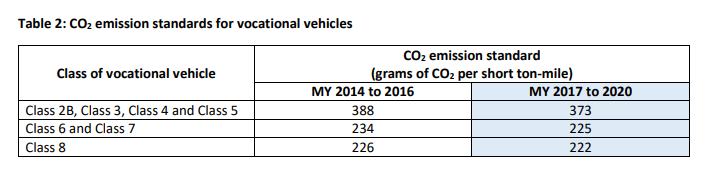

##However, only data from 2014 is available. Therefore, we we assume same value for previous year as well. The equipment classses are mapped to the vehicle class provided by the Canadian gov.
##Source: https://www.canada.ca/en/environment-climate-change/services/canadian-environmental-protection-act-registry/publications/vehicle-emission-regulations-guidance-document/chapters-a-e.html#c_c1

#However, the above table shows the CO2 emission rate of heavy trucks meansured in mileage. WE need to find CO2 emission rate for heavy trucks measured in hoursmeter.

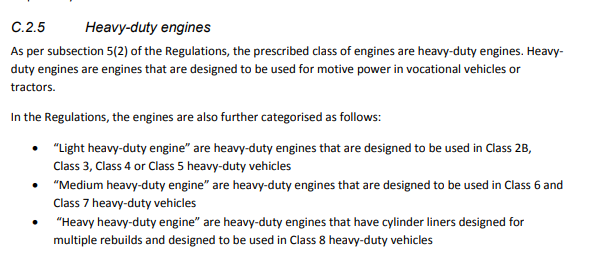.
##The Canadian gov has further classified the heavy truck engines. And given the Co2 standard. 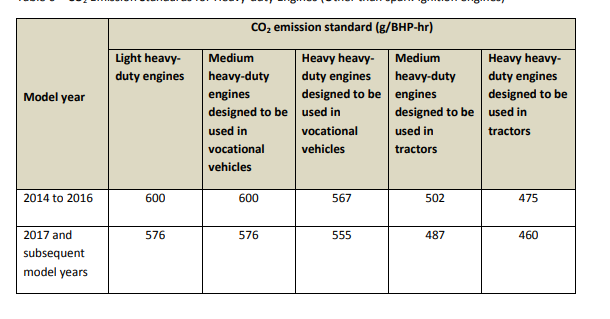

In [34]:
df_heavy_Truck[df_heavy_Truck["PrimaryMetric"] == "hours"]["Equipment Class"].unique()

array(['TRUCK, REFUSE, SIDE LOADER, AUTOMATED, 20 YARD',
       'TRUCK, REFUSE, REAR LOADER, 20 YARD', 'TRUCK, AERIAL, 40 FT BOOM'],
      dtype=object)

##Only, these three equipment classes are there in heavy truck (hoursmeter)

## The initial mapping as per the equipment category has been done using excel

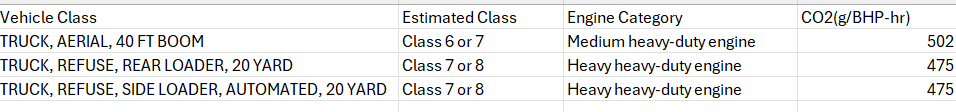

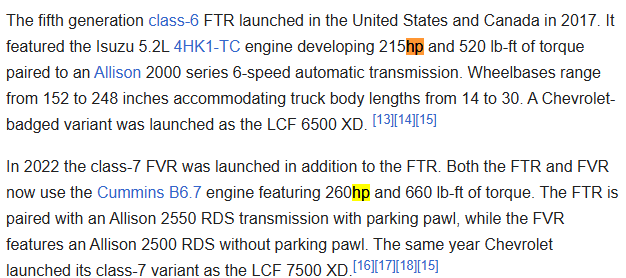

#The engines emissions are in g/BHP-hr. SO inorder to convert them into g/hr. We need to have BHP. Therefore, specific BHP has been extracted from Wikipedia.

Source: https://en.wikipedia.org/wiki/Isuzu_Forward?

#As CO2 rates are different for mileage and hour-meter vehicles. Merging will be done sperately.

In [35]:
df_heavy_Truck_mileage = df_heavy_Truck[df_heavy_Truck["PrimaryMetric"] == "mileage"]
df_heavy_Truck_hours = df_heavy_Truck[df_heavy_Truck["PrimaryMetric"] == "hours"]

#First, let's merge mileage

In [36]:
df_HT_CO2_mileage = files.upload()

Saving HT_CO2_Standard.xlsx to HT_CO2_Standard.xlsx


In [37]:
df_HT_CO2_mileage = pd.read_excel("HT_CO2_Standard.xlsx", sheet_name="HT_CO2_Standard_Mileage")

In [38]:
df_HT_CO2_mileage

,Vehicle Class,CO2 (g/tons),Avg Weight (tons),CO2(g/mi),Type,Estimated Class,Classification Justification
0,"TRUCK, DUMP, 1 YARD",388,7.50,2910.00,Vocational,Class 4,Small service or dump truck; typically assigne...
1,"TRUCK, VAN, POWER TAILGATE, SINGLE AXLE",388,8.88,3445.44,Vocational,Class 5 or 6,General utility or support vehicle; likely ass...
2,"TRUCK, FLATDECK, LIGHT",388,8.88,3445.44,Vocational,Class 5 or 6,General utility or support vehicle; likely ass...
3,"TRUCK, AERIAL, 40 FT BOOM",234,11.38,2662.92,Vocational,Class 6 or 7,Boom or crane-equipped truck; used for elevate...
4,"TRUCK, AERIAL, 40 FT BOOM, HYBRID ELEC",234,11.38,2662.92,Vocational,Class 6 or 7,Boom or crane-equipped truck; used for elevate...
5,"TRUCK, DUMP, TANDEM AXLE",234,18.00,4212.00,Vocational,Class 7 or 8,Heavy-duty tandem axle or tractor vehicle; com...
6,"TRUCK, AERIAL, 50 FT PLUS BOOM",234,11.38,2662.92,Vocational,Class 6 or 7,Boom or crane-equipped truck; used for elevate...
7,"TRUCK, DUMP, 4-7.5 YARD",388,8.80,3414.40,Vocational,Class 5,Medium dump or outfitted service truck; often ...
8,"TRUCK, SERVICE, WITH TOOLS, 3 TON",388,7.50,2910.00,Vocational,Class 4,Small service or dump truck; typically assigne...
9,"TRUCK, SERVICE, 3 TON",388,7.50,2910.00,Vocational,Class 4,Small service or dump truck; typically assigne...


In [39]:
df_HT_CO2_mileage = df_HT_CO2_mileage[["Vehicle Class", "CO2(g/mi)"]]
df_HT_CO2_mileage.head()

,Vehicle Class,CO2(g/mi)
0,"TRUCK, DUMP, 1 YARD",2910.00
1,"TRUCK, VAN, POWER TAILGATE, SINGLE AXLE",3445.44
2,"TRUCK, FLATDECK, LIGHT",3445.44
3,"TRUCK, AERIAL, 40 FT BOOM",2662.92
4,"TRUCK, AERIAL, 40 FT BOOM, HYBRID ELEC",2662.92


In [40]:
df_heavy_Truck_mileage_merged = pd.merge(df_heavy_Truck_mileage, df_HT_CO2_mileage, left_on="Equipment Class", right_on="Vehicle Class", how="left")

In [41]:
df_heavy_Truck_mileage_merged.head()

,Equipment Number,Equipment Class,Equipment Category,Service Group,Department,Make,Model,Year,Site,Mileage2024 (km),HourMeter2024 (hours),DowntimeHours2024 (hours),LaborHours2024 (hours),PrimaryMetric,Age,Vehicle Class,CO2(g/mi)
0,A1203,"TRUCK, DUMP, 1 YARD",hvy trk,Engineering Services,ENGINEERING STREETS OPER.,FORD,F450,2008,NATIONAL YD. (701 NATIONAL),19194.0,1144.0,437.383329,125.26611,mileage,17,"TRUCK, DUMP, 1 YARD",2910.00
1,A1204,"TRUCK, DUMP, 1 YARD",hvy trk,Engineering Services,ENGINEERING STREETS OPER.,FORD,F550,2006,NATIONAL YD. (701 NATIONAL),3088.0,NaN,200.696388,47.08251,mileage,19,"TRUCK, DUMP, 1 YARD",2910.00
2,A1205,"TRUCK, DUMP, 1 YARD",hvy trk,Engineering Services,ENGINEERING EQS LOANER POOL,FORD,F450,2007,NATIONAL YD. (701 NATIONAL),5155.0,NaN,40.551945,18.69334,mileage,18,"TRUCK, DUMP, 1 YARD",2910.00
3,A1206,"TRUCK, VAN, POWER TAILGATE, SINGLE AXLE",hvy trk,Engineering Services,ENGINEERING STREETS OPER.,FORD,F350,2003,MANITOBA YD. (250 W. 70TH),4396.0,NaN,94.964444,10.56415,mileage,22,"TRUCK, VAN, POWER TAILGATE, SINGLE AXLE",3445.44
4,A1240,"TRUCK, DUMP, 1 YARD",hvy trk,Engineering Services,ENGINEERING STREETS OPER.,FORD,F550,2005,NATIONAL YD. (701 NATIONAL),3998.0,NaN,257.955280,70.89446,mileage,20,"TRUCK, DUMP, 1 YARD",2910.00


In [42]:
df_heavy_Truck_mileage_merged.isna().sum()

,0
Equipment Number,0
Equipment Class,0
Equipment Category,0
Service Group,0
Department,0
Make,0
Model,0
Year,0
Site,0
Mileage2024 (km),0


In [43]:
df_heavy_Truck_mileage_merged["CO2(g/km)"] = df_heavy_Truck_mileage_merged['CO2(g/mi)']/1.60934

In [44]:
df_heavy_Truck_mileage_merged["Total CO2 Emission (g)"] = df_heavy_Truck_mileage_merged["CO2(g/km)"] * df_heavy_Truck_mileage_merged['Mileage2024 (km)']

In [45]:
df_heavy_Truck_mileage_merged.isna().sum()

,0
Equipment Number,0
Equipment Class,0
Equipment Category,0
Service Group,0
Department,0
Make,0
Model,0
Year,0
Site,0
Mileage2024 (km),0


In [46]:
df_heavy_Truck_mileage_merged.drop(columns=["CO2(g/mi)"], inplace=True)

In [47]:
df_heavy_Truck_mileage_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Equipment Number           328 non-null    object 
 1   Equipment Class            328 non-null    object 
 2   Equipment Category         328 non-null    object 
 3   Service Group              328 non-null    object 
 4   Department                 328 non-null    object 
 5   Make                       328 non-null    object 
 6   Model                      328 non-null    object 
 7   Year                       328 non-null    int64  
 8   Site                       328 non-null    object 
 9   Mileage2024 (km)           328 non-null    float64
 10  HourMeter2024 (hours)      54 non-null     float64
 11  DowntimeHours2024 (hours)  328 non-null    float64
 12  LaborHours2024 (hours)     328 non-null    float64
 13  PrimaryMetric              328 non-null    object 

In [48]:
df_heavy_Truck_mileage_merged.head()

,Equipment Number,Equipment Class,Equipment Category,Service Group,Department,Make,Model,Year,Site,Mileage2024 (km),HourMeter2024 (hours),DowntimeHours2024 (hours),LaborHours2024 (hours),PrimaryMetric,Age,Vehicle Class,CO2(g/km),Total CO2 Emission (g)
0,A1203,"TRUCK, DUMP, 1 YARD",hvy trk,Engineering Services,ENGINEERING STREETS OPER.,FORD,F450,2008,NATIONAL YD. (701 NATIONAL),19194.0,1144.0,437.383329,125.26611,mileage,17,"TRUCK, DUMP, 1 YARD",1808.194664,3.470649e+07
1,A1204,"TRUCK, DUMP, 1 YARD",hvy trk,Engineering Services,ENGINEERING STREETS OPER.,FORD,F550,2006,NATIONAL YD. (701 NATIONAL),3088.0,NaN,200.696388,47.08251,mileage,19,"TRUCK, DUMP, 1 YARD",1808.194664,5.583705e+06
2,A1205,"TRUCK, DUMP, 1 YARD",hvy trk,Engineering Services,ENGINEERING EQS LOANER POOL,FORD,F450,2007,NATIONAL YD. (701 NATIONAL),5155.0,NaN,40.551945,18.69334,mileage,18,"TRUCK, DUMP, 1 YARD",1808.194664,9.321243e+06
3,A1206,"TRUCK, VAN, POWER TAILGATE, SINGLE AXLE",hvy trk,Engineering Services,ENGINEERING STREETS OPER.,FORD,F350,2003,MANITOBA YD. (250 W. 70TH),4396.0,NaN,94.964444,10.56415,mileage,22,"TRUCK, VAN, POWER TAILGATE, SINGLE AXLE",2140.902482,9.411407e+06
4,A1240,"TRUCK, DUMP, 1 YARD",hvy trk,Engineering Services,ENGINEERING STREETS OPER.,FORD,F550,2005,NATIONAL YD. (701 NATIONAL),3998.0,NaN,257.955280,70.89446,mileage,20,"TRUCK, DUMP, 1 YARD",1808.194664,7.229162e+06


In [49]:
df_heavy_Truck_mileage_merged.drop(columns="Vehicle Class", inplace=True)

In [50]:
df_heavy_Truck_mileage_merged.head()

,Equipment Number,Equipment Class,Equipment Category,Service Group,Department,Make,Model,Year,Site,Mileage2024 (km),HourMeter2024 (hours),DowntimeHours2024 (hours),LaborHours2024 (hours),PrimaryMetric,Age,CO2(g/km),Total CO2 Emission (g)
0,A1203,"TRUCK, DUMP, 1 YARD",hvy trk,Engineering Services,ENGINEERING STREETS OPER.,FORD,F450,2008,NATIONAL YD. (701 NATIONAL),19194.0,1144.0,437.383329,125.26611,mileage,17,1808.194664,3.470649e+07
1,A1204,"TRUCK, DUMP, 1 YARD",hvy trk,Engineering Services,ENGINEERING STREETS OPER.,FORD,F550,2006,NATIONAL YD. (701 NATIONAL),3088.0,NaN,200.696388,47.08251,mileage,19,1808.194664,5.583705e+06
2,A1205,"TRUCK, DUMP, 1 YARD",hvy trk,Engineering Services,ENGINEERING EQS LOANER POOL,FORD,F450,2007,NATIONAL YD. (701 NATIONAL),5155.0,NaN,40.551945,18.69334,mileage,18,1808.194664,9.321243e+06
3,A1206,"TRUCK, VAN, POWER TAILGATE, SINGLE AXLE",hvy trk,Engineering Services,ENGINEERING STREETS OPER.,FORD,F350,2003,MANITOBA YD. (250 W. 70TH),4396.0,NaN,94.964444,10.56415,mileage,22,2140.902482,9.411407e+06
4,A1240,"TRUCK, DUMP, 1 YARD",hvy trk,Engineering Services,ENGINEERING STREETS OPER.,FORD,F550,2005,NATIONAL YD. (701 NATIONAL),3998.0,NaN,257.955280,70.89446,mileage,20,1808.194664,7.229162e+06


##Now its time for hours

In [51]:
df_heavy_Truck_hours.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 877 to 966
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Equipment Number           36 non-null     object 
 1   Equipment Class            36 non-null     object 
 2   Equipment Category         36 non-null     object 
 3   Service Group              36 non-null     object 
 4   Department                 36 non-null     object 
 5   Make                       36 non-null     object 
 6   Model                      36 non-null     object 
 7   Year                       36 non-null     int64  
 8   Site                       36 non-null     object 
 9   Mileage2024 (km)           0 non-null      float64
 10  HourMeter2024 (hours)      36 non-null     float64
 11  DowntimeHours2024 (hours)  36 non-null     float64
 12  LaborHours2024 (hours)     36 non-null     float64
 13  PrimaryMetric              36 non-null     object 
 14

In [52]:
df_HT_CO2_hours = pd.read_excel("HT_CO2_Standard.xlsx", sheet_name="HT_CO2_Standard_Hours")

In [53]:
df_HT_CO2_hours

,Vehicle Class,Estimated Class,Engine Category,CO2(g/BHP-hr),BHP,CO2(g/hour)
0,"TRUCK, AERIAL, 40 FT BOOM",Class 6 or 7,Medium heavy-duty engine,502,215,107930
1,"TRUCK, REFUSE, REAR LOADER, 20 YARD",Class 7 or 8,Heavy heavy-duty engine,475,260,123500
2,"TRUCK, REFUSE, SIDE LOADER, AUTOMATED, 20 YARD",Class 7 or 8,Heavy heavy-duty engine,475,260,123500


In [54]:
df_HT_CO2_hours = df_HT_CO2_hours[["Vehicle Class", "CO2(g/hour)"]]

In [55]:
df_HT_CO2_hours

,Vehicle Class,CO2(g/hour)
0,"TRUCK, AERIAL, 40 FT BOOM",107930
1,"TRUCK, REFUSE, REAR LOADER, 20 YARD",123500
2,"TRUCK, REFUSE, SIDE LOADER, AUTOMATED, 20 YARD",123500


In [56]:
df_heavy_Truck_hours_merged = pd.merge(df_heavy_Truck_hours, df_HT_CO2_hours, left_on="Equipment Class", right_on="Vehicle Class", how="left")

In [57]:
df_heavy_Truck_hours_merged.head()

,Equipment Number,Equipment Class,Equipment Category,Service Group,Department,Make,Model,Year,Site,Mileage2024 (km),HourMeter2024 (hours),DowntimeHours2024 (hours),LaborHours2024 (hours),PrimaryMetric,Age,Vehicle Class,CO2(g/hour)
0,C1572,"TRUCK, REFUSE, SIDE LOADER, AUTOMATED, 20 YARD",hvy trk,Engineering Services,ENGINEERING SANITATION UTILITY,STERLING,CONDOR,2005,MANITOBA YD. (250 W. 70TH),NaN,997.0,471.970273,217.64138,hours,20,"TRUCK, REFUSE, SIDE LOADER, AUTOMATED, 20 YARD",123500
1,C1573,"TRUCK, REFUSE, SIDE LOADER, AUTOMATED, 20 YARD",hvy trk,Engineering Services,ENGINEERING SANITATION UTILITY,STERLING,CONDOR,2005,MANITOBA YD. (250 W. 70TH),NaN,1868.0,708.491949,467.32168,hours,20,"TRUCK, REFUSE, SIDE LOADER, AUTOMATED, 20 YARD",123500
2,C1574,"TRUCK, REFUSE, SIDE LOADER, AUTOMATED, 20 YARD",hvy trk,Engineering Services,ENGINEERING SANITATION UTILITY,STERLING,CONDOR,2005,MANITOBA YD. (250 W. 70TH),NaN,1440.0,507.568055,310.14176,hours,20,"TRUCK, REFUSE, SIDE LOADER, AUTOMATED, 20 YARD",123500
3,C1575,"TRUCK, REFUSE, SIDE LOADER, AUTOMATED, 20 YARD",hvy trk,Engineering Services,ENGINEERING SANITATION UTILITY,STERLING,CONDOR,2005,MANITOBA YD. (250 W. 70TH),NaN,1189.0,700.797787,431.43499,hours,20,"TRUCK, REFUSE, SIDE LOADER, AUTOMATED, 20 YARD",123500
4,C1576,"TRUCK, REFUSE, SIDE LOADER, AUTOMATED, 20 YARD",hvy trk,Engineering Services,ENGINEERING SANITATION UTILITY,STERLING,CONDOR,2005,MANITOBA YD. (250 W. 70TH),NaN,1253.0,469.196114,269.46219,hours,20,"TRUCK, REFUSE, SIDE LOADER, AUTOMATED, 20 YARD",123500


In [58]:
df_heavy_Truck_hours_merged.isna().sum()

,0
Equipment Number,0
Equipment Class,0
Equipment Category,0
Service Group,0
Department,0
Make,0
Model,0
Year,0
Site,0
Mileage2024 (km),36


In [59]:
df_heavy_Truck_hours_merged["Total CO2 Emission (g)"] = df_heavy_Truck_hours_merged["CO2(g/hour)"] * df_heavy_Truck_hours_merged['HourMeter2024 (hours)']

In [60]:
df_heavy_Truck_hours_merged.head()

,Equipment Number,Equipment Class,Equipment Category,Service Group,Department,Make,Model,Year,Site,Mileage2024 (km),HourMeter2024 (hours),DowntimeHours2024 (hours),LaborHours2024 (hours),PrimaryMetric,Age,Vehicle Class,CO2(g/hour),Total CO2 Emission (g)
0,C1572,"TRUCK, REFUSE, SIDE LOADER, AUTOMATED, 20 YARD",hvy trk,Engineering Services,ENGINEERING SANITATION UTILITY,STERLING,CONDOR,2005,MANITOBA YD. (250 W. 70TH),NaN,997.0,471.970273,217.64138,hours,20,"TRUCK, REFUSE, SIDE LOADER, AUTOMATED, 20 YARD",123500,123129500.0
1,C1573,"TRUCK, REFUSE, SIDE LOADER, AUTOMATED, 20 YARD",hvy trk,Engineering Services,ENGINEERING SANITATION UTILITY,STERLING,CONDOR,2005,MANITOBA YD. (250 W. 70TH),NaN,1868.0,708.491949,467.32168,hours,20,"TRUCK, REFUSE, SIDE LOADER, AUTOMATED, 20 YARD",123500,230698000.0
2,C1574,"TRUCK, REFUSE, SIDE LOADER, AUTOMATED, 20 YARD",hvy trk,Engineering Services,ENGINEERING SANITATION UTILITY,STERLING,CONDOR,2005,MANITOBA YD. (250 W. 70TH),NaN,1440.0,507.568055,310.14176,hours,20,"TRUCK, REFUSE, SIDE LOADER, AUTOMATED, 20 YARD",123500,177840000.0
3,C1575,"TRUCK, REFUSE, SIDE LOADER, AUTOMATED, 20 YARD",hvy trk,Engineering Services,ENGINEERING SANITATION UTILITY,STERLING,CONDOR,2005,MANITOBA YD. (250 W. 70TH),NaN,1189.0,700.797787,431.43499,hours,20,"TRUCK, REFUSE, SIDE LOADER, AUTOMATED, 20 YARD",123500,146841500.0
4,C1576,"TRUCK, REFUSE, SIDE LOADER, AUTOMATED, 20 YARD",hvy trk,Engineering Services,ENGINEERING SANITATION UTILITY,STERLING,CONDOR,2005,MANITOBA YD. (250 W. 70TH),NaN,1253.0,469.196114,269.46219,hours,20,"TRUCK, REFUSE, SIDE LOADER, AUTOMATED, 20 YARD",123500,154745500.0


In [61]:
df_heavy_Truck_hours_merged.drop(columns=["Vehicle Class"], inplace=True)

In [62]:
df_heavy_Truck_hours_merged.isna().sum()

,0
Equipment Number,0
Equipment Class,0
Equipment Category,0
Service Group,0
Department,0
Make,0
Model,0
Year,0
Site,0
Mileage2024 (km),36


In [63]:
df_heavy_Truck_merged = pd.concat([df_heavy_Truck_mileage_merged, df_heavy_Truck_hours_merged], axis=0)

In [64]:
df_heavy_Truck_merged.head()

,Equipment Number,Equipment Class,Equipment Category,Service Group,Department,Make,Model,Year,Site,Mileage2024 (km),HourMeter2024 (hours),DowntimeHours2024 (hours),LaborHours2024 (hours),PrimaryMetric,Age,CO2(g/km),Total CO2 Emission (g),CO2(g/hour)
0,A1203,"TRUCK, DUMP, 1 YARD",hvy trk,Engineering Services,ENGINEERING STREETS OPER.,FORD,F450,2008,NATIONAL YD. (701 NATIONAL),19194.0,1144.0,437.383329,125.26611,mileage,17,1808.194664,3.470649e+07,NaN
1,A1204,"TRUCK, DUMP, 1 YARD",hvy trk,Engineering Services,ENGINEERING STREETS OPER.,FORD,F550,2006,NATIONAL YD. (701 NATIONAL),3088.0,NaN,200.696388,47.08251,mileage,19,1808.194664,5.583705e+06,NaN
2,A1205,"TRUCK, DUMP, 1 YARD",hvy trk,Engineering Services,ENGINEERING EQS LOANER POOL,FORD,F450,2007,NATIONAL YD. (701 NATIONAL),5155.0,NaN,40.551945,18.69334,mileage,18,1808.194664,9.321243e+06,NaN
3,A1206,"TRUCK, VAN, POWER TAILGATE, SINGLE AXLE",hvy trk,Engineering Services,ENGINEERING STREETS OPER.,FORD,F350,2003,MANITOBA YD. (250 W. 70TH),4396.0,NaN,94.964444,10.56415,mileage,22,2140.902482,9.411407e+06,NaN
4,A1240,"TRUCK, DUMP, 1 YARD",hvy trk,Engineering Services,ENGINEERING STREETS OPER.,FORD,F550,2005,NATIONAL YD. (701 NATIONAL),3998.0,NaN,257.955280,70.89446,mileage,20,1808.194664,7.229162e+06,NaN


In [65]:
df_heavy_Truck_merged.describe()

,Year,Mileage2024 (km),HourMeter2024 (hours),DowntimeHours2024 (hours),LaborHours2024 (hours),Age,CO2(g/km),Total CO2 Emission (g),CO2(g/hour)
count,364.000000,328.000000,90.000000,364.000000,364.000000,364.000000,328.000000,3.640000e+02,36.000000
mean,2006.068681,9947.995427,840.033333,345.676640,112.078692,18.931319,2056.826848,3.536915e+07,122202.500000
std,4.353930,9089.112939,545.831485,283.039305,116.998806,4.353930,329.360187,4.886563e+07,4364.363724
min,1990.000000,0.000000,0.000000,4.965278,2.882500,11.000000,1446.555731,0.000000e+00,107930.000000
25%,2003.000000,4759.750000,343.750000,157.271597,36.566387,16.000000,1808.194664,8.914852e+06,123500.000000
50%,2005.000000,7752.250000,812.500000,265.909167,64.670400,20.000000,2121.615072,1.808918e+07,123500.000000
75%,2009.000000,12308.500000,1357.250000,455.379306,138.787775,22.000000,2144.668001,3.170689e+07,123500.000000
max,2014.000000,64500.000000,2100.000000,1685.859456,652.884770,35.000000,2617.221967,2.593500e+08,123500.000000


In [66]:
df_heavy_Truck_hours_merged.describe()

,Year,Mileage2024 (km),HourMeter2024 (hours),DowntimeHours2024 (hours),LaborHours2024 (hours),Age,CO2(g/hour),Total CO2 Emission (g)
count,36.000000,0.0,36.000000,36.000000,36.000000,36.000000,36.000000,3.600000e+01
mean,2005.222222,NaN,1301.305556,568.773959,326.250016,19.777778,122202.500000,1.599846e+08
std,0.865567,NaN,366.072422,255.432175,147.459677,0.865567,4364.363724,4.611634e+07
min,2005.000000,NaN,201.000000,64.336389,24.115560,15.000000,107930.000000,2.169393e+07
25%,2005.000000,NaN,1187.000000,425.283747,245.921173,20.000000,123500.000000,1.448655e+08
50%,2005.000000,NaN,1358.500000,516.295973,354.279720,20.000000,123500.000000,1.677748e+08
75%,2005.000000,NaN,1437.000000,782.888536,410.008123,20.000000,123500.000000,1.774695e+08
max,2010.000000,NaN,2100.000000,1321.720009,652.884770,20.000000,123500.000000,2.593500e+08


In [67]:
df_heavy_Truck_mileage_merged.describe()

,Year,Mileage2024 (km),HourMeter2024 (hours),DowntimeHours2024 (hours),LaborHours2024 (hours),Age,CO2(g/km),Total CO2 Emission (g)
count,328.000000,328.000000,54.000000,328.000000,328.000000,328.000000,328.000000,3.280000e+02
mean,2006.161585,9947.995427,532.518519,321.190349,88.572083,18.838415,2056.826848,2.169184e+07
std,4.569021,9089.112939,413.437260,275.438592,85.230689,4.569021,329.360187,2.293131e+07
min,1990.000000,0.000000,0.000000,4.965278,2.882500,11.000000,1446.555731,0.000000e+00
25%,2002.000000,4759.750000,256.250000,141.249167,34.499448,15.750000,1808.194664,8.672554e+06
50%,2005.000000,7752.250000,486.000000,250.398334,58.298320,20.000000,2121.615072,1.464286e+07
75%,2009.250000,12308.500000,663.750000,405.201178,111.790042,23.000000,2144.668001,2.633211e+07
max,2014.000000,64500.000000,1940.000000,1685.859456,427.350240,35.000000,2617.221967,1.630395e+08


#We need heavy equip records as well for power bi dashboard

In [68]:
df["Equipment Category"].unique()

array(['light duty', 'hvy trk', 'hvy equip'], dtype=object)

In [71]:
df_heavy_equip = df[df["Equipment Category"] == "hvy equip"]

In [75]:
df= pd.concat([df_light_duty_merged, df_heavy_Truck_merged, df_heavy_equip], axis=0)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1091 entries, 0 to 1090
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 727 non-null    float64
 1   Equipment Number           1091 non-null   object 
 2   Equipment Class            1091 non-null   object 
 3   Equipment Category         1091 non-null   object 
 4   Service Group              1091 non-null   object 
 5   Department                 1091 non-null   object 
 6   Make                       1091 non-null   object 
 7   Model                      1091 non-null   object 
 8   Year                       1091 non-null   int64  
 9   Site                       1091 non-null   object 
 10  Mileage2024 (km)           833 non-null    float64
 11  HourMeter2024 (hours)      332 non-null    float64
 12  DowntimeHours2024 (hours)  1091 non-null   float64
 13  LaborHours2024 (hours)     1091 non-null   float64
 1

In [77]:
len(df)

1091

In [78]:
df.to_csv("FinalFleet_Data.csv")

In [79]:
files.download("FinalFleet_Data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>